# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 
2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).


**1)Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? **
$B=(b_1,...,b_n),X=(x_1,...,x_m)$

Lets see $k-th$ column of $(AXB)$, 
$AXb_k=A(\sum_{i = 1}^m b_{ik})=\sum_{i=1}^nb_{ik}Ax{i}=(b_{1,k}A...b_{m,k}A)\begin{pmatrix} x_1 \\ \vdots \\ x_m \end{pmatrix}$

It is mean that:
$vec(AXB)=\begin{pmatrix} AXb_1 \\ ... \\ AXb_n \end{pmatrix} = 
 \begin{pmatrix} b_1^T \otimes A \\ ... \\ b_n^T \otimes A\end{pmatrix} vec(X) = (B^T \otimes A) vec(X)$
 
 
 So, for rowwise reshape, it can be showed analogously:
 
 
$A = \begin{pmatrix} a_1 \\ ... \\ a_n \end{pmatrix} , X = \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix}$

$a_k X B =  \sum_{i=1}^n a_{ik} x_i B =  \sum_{i=1}^n a_{ik} B^T x_i  = \begin{pmatrix} a_{1k} B^T & ... & a_{nk} B^T \end{pmatrix} \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix} = (a_k \otimes B^T) vec(X)$

$vec(AXB) = \begin{pmatrix} a_1XB &  ...  a_nXB \end{pmatrix} = 
 \begin{pmatrix} a_1 \otimes B^T & ... & a_n \otimes B^T\end{pmatrix} vec(X) = (A \otimes B^T ) vec(X)$
 
 **2)  What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.**
 Naive complexity of the Kronecker product for 2 matrices: $\mathcal{O}(n^4)$
 product by vector is $\mathcal{O}(n^2)$, and final complexity is $\mathcal{O}(n^4)$
 
 
 We can make it faster if use equation from 1st punkt, we nust reshape vector $x$ to $n\times n$ matrix, complexity of reshaping is $\mathcal{O}(n^2)$
 
 So, $(a\otimes B)x=(A\otimes B)vec(X)=vec(BXA^T)$, thus complexety of multiplication 3 matrices $n\times n$,  $(B,X,A^T)$ is $\mathcal{O}(n^3)$
 
 ** 3) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of 
the matrix $A\otimes I + I \otimes B$ **
 
 We know that $(A\otimes B)(C\otimes D)=AC\otimes BD$, so 
 $(A\otimes B)^{-1}=(A^{-1}\otimes B^{-1})$
 
 
 Here we can use propery of distributivity and inverse property
 $$
(A\otimes I + I \otimes B) = (S_A \Lambda_A S_A^{-1} \otimes I + I \otimes S_B\Lambda_B S_B^{-1}) = 
(S_A \otimes I)[\Lambda_A \otimes I + I \otimes S_B\Lambda_B S_B^{-1}] (S_A \otimes I)^{-1} =  (S_A \otimes I)(I \otimes S_B)[\Lambda_A \otimes I + I \otimes \Lambda_B] (I \otimes S_B)^{-1}
(S_A \otimes I)^{-1} = (S_A \otimes S_B) [\Lambda_A \otimes I + I \otimes \Lambda_B] (S_A \otimes S_B)^{-1}$$


Let's see $\Lambda_A \otimes I + I \otimes \Lambda_B$ and  $\Lambda_A = \mathrm{diag}(\lambda_1^A, \dots, \lambda_n^A)$ and $\Lambda_B = \mathrm{diag}(\lambda_1^B, \dots, \lambda_m^B)$. Then $\Lambda_A \otimes I + I \otimes \Lambda_B = \begin{pmatrix} \lambda_1^A I & \dots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \dots & \lambda_n^A I \end{pmatrix} +  \begin{pmatrix} \Lambda_B & \dots & 0\\ \vdots & \ddots  & \vdots\\ 0 & \dots  & \Lambda_B \end{pmatrix}$ is a diagonal matrix with $\lambda_i^A + \lambda_j^B, ~ i \in \overline{1,n}, j \in \overline{1,m}$ on the diagonal and they are the eigenvalues.

That means that eigenvectors are the corresponding columns of $S_A \otimes S_B$. 

**4) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using**
    - Richardson iteration with the optimal choice of parameter (use 2-norm)
    - Chebyshev iteration (use 2-norm)
    - Conjugate gradient method (use A-norm).
    
 **Richardson iteration with the optimal choice of parameter**

We know that $\tau_{opt} = \frac{2}{\lambda_{max} + \lambda_{min}}$ and for the given matrix we have $\lambda_{min} = \frac{1}{1000}$ and $\lambda_{max} = 1000 \Rightarrow \mathrm{cond}_2(A) = \frac{\lambda_{max}}{\lambda_{min}} = 10^6$, 

we can calculate number of iterations from this expression: $(1 - \frac{2}{cond_2(A)})^k \leqslant 10^{-4} \Rightarrow k\ln(1- \frac{2}{cond_2(A)}) \leqslant \ln (10^{-4}) \Rightarrow k \geqslant \frac{\ln(10^{-4})}{\ln(1 - \frac{2}{cond_2(A)})} \approx 4,6 \cdot 10^6$ iterations.

**Chebyshev iteration**

we can describe converges as
$$
   e_{k+1} \leq C q^k, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1},
$$

so, we have $q = \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1} \right)^k \leqslant 10^{-4} \Leftrightarrow k( \ln (\sqrt{\mathrm{cond}(A)} - 1) -  \ln (\sqrt{\mathrm{cond} (A)} + 1)) \leqslant -4 \ln 10 \Rightarrow k \geqslant \frac{-4 \ln 10}{\ln \left( \frac{\sqrt{\mathrm{cond}(A)} - 1}{\sqrt{\mathrm{cond}(A)} +1}\right)} \approx 4,6 \cdot 10^3$ iterations.

**Conjugate gradient method**

As we know , if $A$ has $m$ various eigenvalues, CG converges in $m$ iterations. In our case we have $1001$ eigenvalues and, hence, the method requires $1001$ iterations to converge.



## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* (5 pts) Implement the spectral partitioning as the function ```partition```:

**1)Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed **

$s_0$ is eigenvector of $L$, coresponding to eigenvalue ($\lambda$) $0$,
So we know that eigenvector corresponding to $\lambda=0$ is ones 
$$
s_0=\frac{(1,1...,1)^T}{||s_0||}
$$


$p$ it is initial vector, and $p^1$-vector of orthoprojection

$p^1=p-(s_0,p)s_0$,

so now, we can write projection $H$
$$
H=I-\frac{s_0s_0^T}{||s_0||}
$$

In [2]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
from scipy.sparse import csr_matrix
import timeit
import networkx as nx
from  networkx import laplacian_matrix, lollipop_graph

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    n=A.get_shape()[0]
    m_sum=A.sum(axis=0)
    d=np.array(m_sum).flatten()
    D=scipy.sparse.diags(d)
    L=D-A
    

    I=scipy.sparse.eye(A.get_shape()[0])
   
    s0=np.ones(x0.shape[0])
    s0=s0/n
    k=0
    x = x0
    eigs = np.array([0])

    for i  in range(num_iter_fix):
        x=scipy.sparse.linalg.spsolve(L-shift*I,x)
       
        x=x-np.sum(x)*s0
        
        x=x/np.linalg.norm(x)
        eig=x@L@x
        eigs=np.append(eigs,eig)
        
        if np.linalg.norm(eigs[k+1]-eigs[k])/np.linalg.norm(eigs[k])<=eps:
            
            
            break
        k+=1
    if num_iter_fix==0:
        shift=0.05
        x=scipy.sparse.linalg.spsolve(L-shift*I,x)
        x=x/np.sum(x)*s0
        x=x/np.linalg.norm(x)
        eig=x@L@x
        shift=x@L@x
        eigs=np.append(eigs,shift)
        
    for i in range(num_iter_adapt):
        x=scipy.sparse.linalg.spsolve(L-shift*I,x)
        x=x-np.sum(x)*s0
        x=x/np.linalg.norm(x)
      
        eig=x@L@x
        eigs=np.append(eigs,eig)
        shift=x@L@x
       
       
        if np.linalg.norm(eigs[k+1]-eigs[k])/np.linalg.norm(eigs[k])<=eps:
             
            break
        k+=1
        
        
       
    
    
    return x, eigs


In [34]:
#Lets check it
A=np.array([[0,1,1],
           [1,0,1],
           [1,1,0],
           ])
A=csr_matrix(A)
partition(A,0.01,5,10,np.random.rand(3),1e-12)

C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars


(array([ 0.74786509, -0.09016617, -0.65769892]), array([0., 3., 3., 3.]))

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

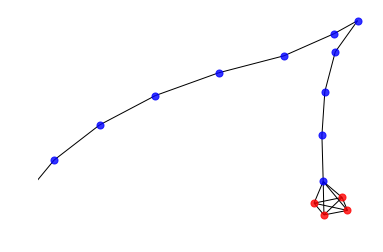

In [71]:
G=nx.lollipop_graph(5,15)
pos=nx.spring_layout(G)
Gm=nx.adjacency_matrix(G)

nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=50,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7,8,9,10,11,12,13,14],
                       node_color='b',
                       node_size=50,
                   alpha=0.8)
nx.draw_networkx_edges(G,pos)
plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() 



In [5]:
G=nx.lollipop_graph(50,50)
G_adj=nx.adjacency_matrix(G)
partition0=partition(G_adj,0.5,0,50,np.random.rand(100),1e-12)[0]
partition1=np.where(partition0>0)[0]
partition2=np.where(partition0<0)[0]

C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


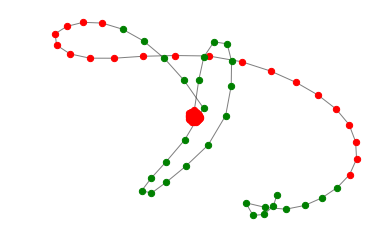

In [7]:
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=list(partition1),
                       node_color='r',
                       node_size=40)
nx.draw_networkx_nodes(G,pos,
                       nodelist=list(partition2),
                       node_color='g',
                       node_size=40)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)




plt.axis('off')
plt.show() 


This can be, because we have bad condition number


### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

**Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.**

Let $x$ nonzero vector in $kerL(G)$, $(Lx,x)=\sum_{j} \sum_{i \in N(j)} (x_i - x_j)^2=0$,

then if $i ∼ j=> x_i=x_j$, We know that if $G$ connected then $dim kerL(G)=1$

Let we have $G_1,G_2,...,G_m$ connected components of $G$ with vertices $n_1,n_2,...n_m$ and $G_1,G_2,...,G_m$  listed according queue, so $L(G)$ is block-diagonal matrix

$$ L(G) = \begin{pmatrix} L(G_1)  & ...  & 0\\... & \ddots &...  \\ 0 & ...  & L(G_n)  \end{pmatrix}$$

It is mean that $ker L(G)=ker L(G_1)\otimes...\otimes ker L(G_k)$

From this point we can say that, $dim kerL(G)= \sum_{i=1}^k~dim~ker~L(G_i) = k$

In [8]:

K = nx.complete_graph(30)
K_adj = nx.adjacency_matrix(K)
partition_k,eigen_k = partition(K_adj, 10, 0, 50, np.random.rand(30), 1e-4)
print("Algebraic connectivity is {}".format(nx.algebraic_connectivity(K)))
print("2nd smallest eigenvalue is {}".format(eigen_k[-1]))
partition_k1=np.where(partition_k>0)[0]
partition_k2=np.where(partition_k<0)[0]


C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


Algebraic connectivity is 29.999999999999993
2nd smallest eigenvalue is 29.999999999999996


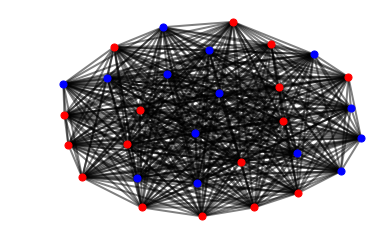

In [9]:

pos=nx.spring_layout(K) # positions for all nodes

# nodes
nx.draw_networkx_nodes(K,pos,
                       nodelist=list(partition_k1),
                       node_color='r',
                       node_size=50)
nx.draw_networkx_nodes(K,pos,
                       nodelist=list(partition_k2),
                       node_color='b',
                       node_size=50)

# edges
nx.draw_networkx_edges(K,pos,width=2.0,alpha=0.5)

plt.axis('off')
plt.show() # display

In [12]:
lamnda=[]
#E=([10,20,30,40,50,60])
for i in range(10,70,10):
    K = nx.complete_graph(i)
    K_adj = nx.adjacency_matrix(K)
    partition_k,eigen_k = partition(K_adj, 10, 0, 50, np.random.rand(i), 1e-4)
    eig=eigen_k[-1]
    lamnda.append(eig)
print(lamnda)    


    

[nan, 19.999999999999996, 29.999999999999993, 40.0, 50.000000000000014, 60.00000000000001]


C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\nikos\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:192: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


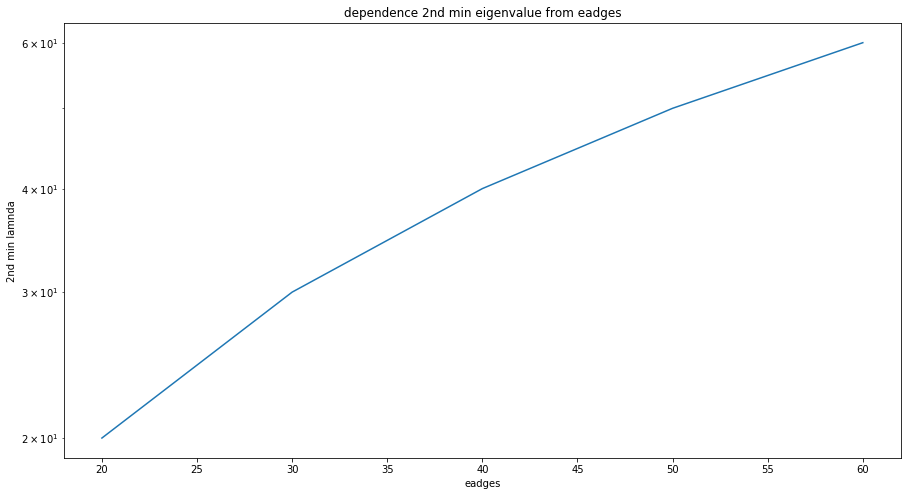

In [13]:
plt.figure(figsize=(15,8))
plt.title('dependence 2nd min eigenvalue from eadges')
plt.ylabel('2nd min lamnda')
plt.xlabel('eadges')

plt.semilogy(range(10,70,10),lamnda)
plt.show()


In [14]:
C=nx.cycle_graph(30)
C_adj=nx.adjacency_matrix(C)
partition_c,eigen_c=partition(C_adj, 0.01, 0, 30, np.random.rand(30), 1e-4)
print("Algebraic connectivity is {}".format(nx.algebraic_connectivity(C)))
print("2nd smallest eigenvalue is {}".format(eigen_c[-1]))
partition_c1=np.where(partition_c>0)[0]
partition_c2=np.where(partition_c<0)[0]


Algebraic connectivity is 0.043704798532389025
2nd smallest eigenvalue is 0.0437047985323887


C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


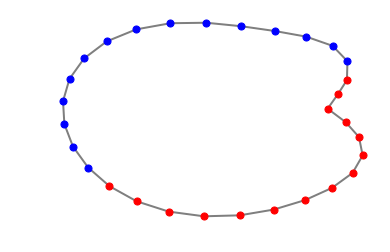

In [15]:
pos=nx.spring_layout(C) # positions for all nodes

# nodes
nx.draw_networkx_nodes(C,pos,
                       nodelist=list(partition_c1),
                       node_color='r',
                       node_size=50)
nx.draw_networkx_nodes(C,pos,
                       nodelist=list(partition_c2),
                       node_color='b',
                       node_size=50)

# edges
nx.draw_networkx_edges(C,pos,width=2.0,alpha=0.5)

plt.axis('off')
plt.show() # display

In [16]:
lamnda=[]
#E=([10,20,30,40,50,60])
for i in range(10,70,10):
    C = nx.cycle_graph(i)
    C_adj = nx.adjacency_matrix(C)
    partition_C,eigen_c = partition(C_adj, 10, 0, 50, np.random.rand(i), 1e-4)
    eig=eigen_c[-1]
    lamnda.append(eig)
print(lamnda) 

[0.3819660112501052, 0.09788696740969285, 0.04370479853238871, 0.024623318809724546, 0.015770597371044342, 0.04370479853238872]


C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


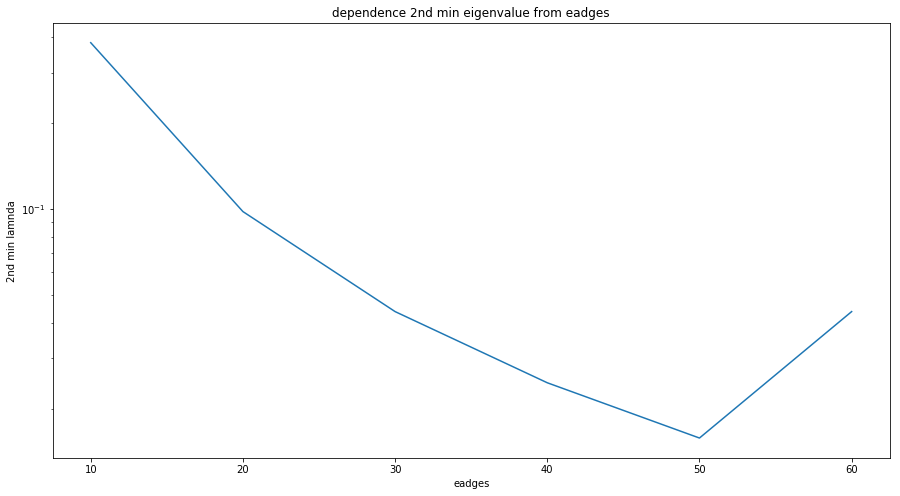

In [17]:
plt.figure(figsize=(15,8))
plt.title('dependence 2nd min eigenvalue from eadges')
plt.ylabel('2nd min lamnda')
plt.xlabel('eadges')

plt.semilogy(range(10,70,10),lamnda)
plt.show()


From this graphs we can see, that for cycle graph, then more eadges, then less our second minimum eigenvalue, for complete graph, we can see absolutly another side.

Also, I see that sometimes for complete graph, second min. eigen value is Nan, I think, this is because i made some fault, and matrix become singular. I think, that it is because our shift in some oment become equal 0, and i think it'is because I made some fault.....

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

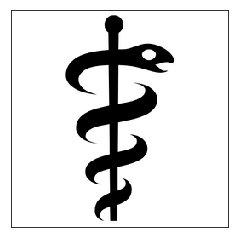

In [44]:
# Your solution is here
from PIL import Image, ImageDraw
import requests
url='https://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-11/256/medical-symbol.png'

picture = Image.open(requests.get(url, stream=True).raw)
picture1= np.array(picture).astype(np.uint8)
plt.imshow(picture)
plt.xticks(())
plt.yticks(())
plt.show()


    

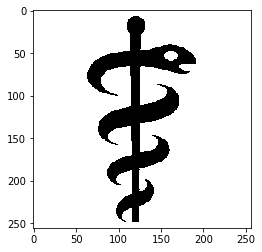

In [74]:
#lets binarize our image
tresh=200
picture1[:,:,0]
binarized=1.0*(picture1[:,:,0]<tresh)
binarized
plt.imshow(binarized,cmap='binary')


In [75]:
#Lets find coordinates of our non zero pixels
x,y=np.array(np.nonzero(binarized))
print(x)
print(y)

def Graph(x,y,picture):
    i=[]
    j=[]
    for k in range(len(x)):
        i0=max(0,x[k]-1)
        i1=min(len(picture),x[k]+1)
        j0=max(0,y[k]-1)
        j1=min(len(picture),y[k]+1)
        for i in range(i0,i1+1):
            for j in range(j0,j1+1):
                print(i,j)
                

    

[  7   7   7 ... 248 248 248]
[117 118 119 ... 122 123 124]


In [47]:
Graph(x,y,binarized)

6 116
6 117
6 118
7 116
7 117
7 118
8 116
8 117
8 118
6 117
6 118
6 119
7 117
7 118
7 119
8 117
8 118
8 119
6 118
6 119
6 120
7 118
7 119
7 120
8 118
8 119
8 120
6 119
6 120
6 121
7 119
7 120
7 121
8 119
8 120
8 121
6 120
6 121
6 122
7 120
7 121
7 122
8 120
8 121
8 122
6 121
6 122
6 123
7 121
7 122
7 123
8 121
8 122
8 123
6 122
6 123
6 124
7 122
7 123
7 124
8 122
8 123
8 124
7 114
7 115
7 116
8 114
8 115
8 116
9 114
9 115
9 116
7 115
7 116
7 117
8 115
8 116
8 117
9 115
9 116
9 117
7 116
7 117
7 118
8 116
8 117
8 118
9 116
9 117
9 118
7 117
7 118
7 119
8 117
8 118
8 119
9 117
9 118
9 119
7 118
7 119
7 120
8 118
8 119
8 120
9 118
9 119
9 120
7 119
7 120
7 121
8 119
8 120
8 121
9 119
9 120
9 121
7 120
7 121
7 122
8 120
8 121
8 122
9 120
9 121
9 122
7 121
7 122
7 123
8 121
8 122
8 123
9 121
9 122
9 123
7 122
7 123
7 124
8 122
8 123
8 124
9 122
9 123
9 124
7 123
7 124
7 125
8 123
8 124
8 125
9 123
9 124
9 125
7 124
7 125
7 126
8 124
8 125
8 126
9 124
9 125
9 126
8 113
8 114
8 115
9 113
9 11

18 115
18 116
16 115
16 116
16 117
17 115
17 116
17 117
18 115
18 116
18 117
16 116
16 117
16 118
17 116
17 117
17 118
18 116
18 117
18 118
16 117
16 118
16 119
17 117
17 118
17 119
18 117
18 118
18 119
16 118
16 119
16 120
17 118
17 119
17 120
18 118
18 119
18 120
16 119
16 120
16 121
17 119
17 120
17 121
18 119
18 120
18 121
16 120
16 121
16 122
17 120
17 121
17 122
18 120
18 121
18 122
16 121
16 122
16 123
17 121
17 122
17 123
18 121
18 122
18 123
16 122
16 123
16 124
17 122
17 123
17 124
18 122
18 123
18 124
16 123
16 124
16 125
17 123
17 124
17 125
18 123
18 124
18 125
16 124
16 125
16 126
17 124
17 125
17 126
18 124
18 125
18 126
16 125
16 126
16 127
17 125
17 126
17 127
18 125
18 126
18 127
16 126
16 127
16 128
17 126
17 127
17 128
18 126
18 127
18 128
16 127
16 128
16 129
17 127
17 128
17 129
18 127
18 128
18 129
16 128
16 129
16 130
17 128
17 129
17 130
18 128
18 129
18 130
16 129
16 130
16 131
17 129
17 130
17 131
18 129
18 130
18 131
16 130
16 131
16 132
17 130
17 131
17 132

24 123
24 124
24 125
22 124
22 125
22 126
23 124
23 125
23 126
24 124
24 125
24 126
22 125
22 126
22 127
23 125
23 126
23 127
24 125
24 126
24 127
22 126
22 127
22 128
23 126
23 127
23 128
24 126
24 127
24 128
22 127
22 128
22 129
23 127
23 128
23 129
24 127
24 128
24 129
22 128
22 129
22 130
23 128
23 129
23 130
24 128
24 129
24 130
22 129
22 130
22 131
23 129
23 130
23 131
24 129
24 130
24 131
23 110
23 111
23 112
24 110
24 111
24 112
25 110
25 111
25 112
23 111
23 112
23 113
24 111
24 112
24 113
25 111
25 112
25 113
23 112
23 113
23 114
24 112
24 113
24 114
25 112
25 113
25 114
23 113
23 114
23 115
24 113
24 114
24 115
25 113
25 114
25 115
23 114
23 115
23 116
24 114
24 115
24 116
25 114
25 115
25 116
23 115
23 116
23 117
24 115
24 116
24 117
25 115
25 116
25 117
23 116
23 117
23 118
24 116
24 117
24 118
25 116
25 117
25 118
23 117
23 118
23 119
24 117
24 118
24 119
25 117
25 118
25 119
23 118
23 119
23 120
24 118
24 119
24 120
25 118
25 119
25 120
23 119
23 120
23 121
24 119
24 120

34 117
35 115
35 116
35 117
36 115
36 116
36 117
34 116
34 117
34 118
35 116
35 117
35 118
36 116
36 117
36 118
34 117
34 118
34 119
35 117
35 118
35 119
36 117
36 118
36 119
34 118
34 119
34 120
35 118
35 119
35 120
36 118
36 119
36 120
34 119
34 120
34 121
35 119
35 120
35 121
36 119
36 120
36 121
34 120
34 121
34 122
35 120
35 121
35 122
36 120
36 121
36 122
34 121
34 122
34 123
35 121
35 122
35 123
36 121
36 122
36 123
34 122
34 123
34 124
35 122
35 123
35 124
36 122
36 123
36 124
34 123
34 124
34 125
35 123
35 124
35 125
36 123
36 124
36 125
34 124
34 125
34 126
35 124
35 125
35 126
36 124
36 125
36 126
34 125
34 126
34 127
35 125
35 126
35 127
36 125
36 126
36 127
35 113
35 114
35 115
36 113
36 114
36 115
37 113
37 114
37 115
35 114
35 115
35 116
36 114
36 115
36 116
37 114
37 115
37 116
35 115
35 116
35 117
36 115
36 116
36 117
37 115
37 116
37 117
35 116
35 117
35 118
36 116
36 117
36 118
37 116
37 117
37 118
35 117
35 118
35 119
36 117
36 118
36 119
37 117
37 118
37 119
35 118

41 166
41 167
41 168
42 166
42 167
42 168
43 166
43 167
43 168
41 167
41 168
41 169
42 167
42 168
42 169
43 167
43 168
43 169
41 168
41 169
41 170
42 168
42 169
42 170
43 168
43 169
43 170
41 169
41 170
41 171
42 169
42 170
42 171
43 169
43 170
43 171
41 170
41 171
41 172
42 170
42 171
42 172
43 170
43 171
43 172
42 113
42 114
42 115
43 113
43 114
43 115
44 113
44 114
44 115
42 114
42 115
42 116
43 114
43 115
43 116
44 114
44 115
44 116
42 115
42 116
42 117
43 115
43 116
43 117
44 115
44 116
44 117
42 116
42 117
42 118
43 116
43 117
43 118
44 116
44 117
44 118
42 117
42 118
42 119
43 117
43 118
43 119
44 117
44 118
44 119
42 118
42 119
42 120
43 118
43 119
43 120
44 118
44 119
44 120
42 119
42 120
42 121
43 119
43 120
43 121
44 119
44 120
44 121
42 120
42 121
42 122
43 120
43 121
43 122
44 120
44 121
44 122
42 121
42 122
42 123
43 121
43 122
43 123
44 121
44 122
44 123
42 122
42 123
42 124
43 122
43 123
43 124
44 122
44 123
44 124
42 123
42 124
42 125
43 123
43 124
43 125
44 123
44 124

46 147
47 145
47 146
47 147
45 146
45 147
45 148
46 146
46 147
46 148
47 146
47 147
47 148
45 147
45 148
45 149
46 147
46 148
46 149
47 147
47 148
47 149
45 148
45 149
45 150
46 148
46 149
46 150
47 148
47 149
47 150
45 149
45 150
45 151
46 149
46 150
46 151
47 149
47 150
47 151
45 150
45 151
45 152
46 150
46 151
46 152
47 150
47 151
47 152
45 151
45 152
45 153
46 151
46 152
46 153
47 151
47 152
47 153
45 152
45 153
45 154
46 152
46 153
46 154
47 152
47 153
47 154
45 153
45 154
45 155
46 153
46 154
46 155
47 153
47 154
47 155
45 154
45 155
45 156
46 154
46 155
46 156
47 154
47 155
47 156
45 155
45 156
45 157
46 155
46 156
46 157
47 155
47 156
47 157
45 156
45 157
45 158
46 156
46 157
46 158
47 156
47 157
47 158
45 157
45 158
45 159
46 157
46 158
46 159
47 157
47 158
47 159
45 158
45 159
45 160
46 158
46 159
46 160
47 158
47 159
47 160
45 159
45 160
45 161
46 159
46 160
46 161
47 159
47 160
47 161
45 160
45 161
45 162
46 160
46 161
46 162
47 160
47 161
47 162
45 161
45 162
45 163
46 161

47 180
48 178
48 179
48 180
49 178
49 179
49 180
47 179
47 180
47 181
48 179
48 180
48 181
49 179
49 180
49 181
47 180
47 181
47 182
48 180
48 181
48 182
49 180
49 181
49 182
47 181
47 182
47 183
48 181
48 182
48 183
49 181
49 182
49 183
48 99
48 100
48 101
49 99
49 100
49 101
50 99
50 100
50 101
48 100
48 101
48 102
49 100
49 101
49 102
50 100
50 101
50 102
48 101
48 102
48 103
49 101
49 102
49 103
50 101
50 102
50 103
48 102
48 103
48 104
49 102
49 103
49 104
50 102
50 103
50 104
48 103
48 104
48 105
49 103
49 104
49 105
50 103
50 104
50 105
48 104
48 105
48 106
49 104
49 105
49 106
50 104
50 105
50 106
48 105
48 106
48 107
49 105
49 106
49 107
50 105
50 106
50 107
48 106
48 107
48 108
49 106
49 107
49 108
50 106
50 107
50 108
48 107
48 108
48 109
49 107
49 108
49 109
50 107
50 108
50 109
48 108
48 109
48 110
49 108
49 109
49 110
50 108
50 109
50 110
48 109
48 110
48 111
49 109
49 110
49 111
50 109
50 110
50 111
48 110
48 111
48 112
49 110
49 111
49 112
50 110
50 111
50 112
48 111
48

52 101
52 102
50 101
50 102
50 103
51 101
51 102
51 103
52 101
52 102
52 103
50 102
50 103
50 104
51 102
51 103
51 104
52 102
52 103
52 104
50 103
50 104
50 105
51 103
51 104
51 105
52 103
52 104
52 105
50 104
50 105
50 106
51 104
51 105
51 106
52 104
52 105
52 106
50 105
50 106
50 107
51 105
51 106
51 107
52 105
52 106
52 107
50 106
50 107
50 108
51 106
51 107
51 108
52 106
52 107
52 108
50 107
50 108
50 109
51 107
51 108
51 109
52 107
52 108
52 109
50 108
50 109
50 110
51 108
51 109
51 110
52 108
52 109
52 110
50 109
50 110
50 111
51 109
51 110
51 111
52 109
52 110
52 111
50 110
50 111
50 112
51 110
51 111
51 112
52 110
52 111
52 112
50 111
50 112
50 113
51 111
51 112
51 113
52 111
52 112
52 113
50 112
50 113
50 114
51 112
51 113
51 114
52 112
52 113
52 114
50 113
50 114
50 115
51 113
51 114
51 115
52 113
52 114
52 115
50 114
50 115
50 116
51 114
51 115
51 116
52 114
52 115
52 116
50 115
50 116
50 117
51 115
51 116
51 117
52 115
52 116
52 117
50 116
50 117
50 118
51 116
51 117
51 118

53 93
53 94
53 95
54 93
54 94
54 95
52 94
52 95
52 96
53 94
53 95
53 96
54 94
54 95
54 96
52 95
52 96
52 97
53 95
53 96
53 97
54 95
54 96
54 97
52 96
52 97
52 98
53 96
53 97
53 98
54 96
54 97
54 98
52 97
52 98
52 99
53 97
53 98
53 99
54 97
54 98
54 99
52 98
52 99
52 100
53 98
53 99
53 100
54 98
54 99
54 100
52 99
52 100
52 101
53 99
53 100
53 101
54 99
54 100
54 101
52 100
52 101
52 102
53 100
53 101
53 102
54 100
54 101
54 102
52 101
52 102
52 103
53 101
53 102
53 103
54 101
54 102
54 103
52 102
52 103
52 104
53 102
53 103
53 104
54 102
54 103
54 104
52 103
52 104
52 105
53 103
53 104
53 105
54 103
54 104
54 105
52 104
52 105
52 106
53 104
53 105
53 106
54 104
54 105
54 106
52 105
52 106
52 107
53 105
53 106
53 107
54 105
54 106
54 107
52 106
52 107
52 108
53 106
53 107
53 108
54 106
54 107
54 108
52 107
52 108
52 109
53 107
53 108
53 109
54 107
54 108
54 109
52 108
52 109
52 110
53 108
53 109
53 110
54 108
54 109
54 110
52 109
52 110
52 111
53 109
53 110
53 111
54 109
54 110
54 111
5

55 185
53 184
53 185
53 186
54 184
54 185
54 186
55 184
55 185
55 186
53 185
53 186
53 187
54 185
54 186
54 187
55 185
55 186
55 187
53 186
53 187
53 188
54 186
54 187
54 188
55 186
55 187
55 188
53 187
53 188
53 189
54 187
54 188
54 189
55 187
55 188
55 189
54 78
54 79
54 80
55 78
55 79
55 80
56 78
56 79
56 80
54 79
54 80
54 81
55 79
55 80
55 81
56 79
56 80
56 81
54 80
54 81
54 82
55 80
55 81
55 82
56 80
56 81
56 82
54 81
54 82
54 83
55 81
55 82
55 83
56 81
56 82
56 83
54 82
54 83
54 84
55 82
55 83
55 84
56 82
56 83
56 84
54 83
54 84
54 85
55 83
55 84
55 85
56 83
56 84
56 85
54 84
54 85
54 86
55 84
55 85
55 86
56 84
56 85
56 86
54 85
54 86
54 87
55 85
55 86
55 87
56 85
56 86
56 87
54 86
54 87
54 88
55 86
55 87
55 88
56 86
56 87
56 88
54 87
54 88
54 89
55 87
55 88
55 89
56 87
56 88
56 89
54 88
54 89
54 90
55 88
55 89
55 90
56 88
56 89
56 90
54 89
54 90
54 91
55 89
55 90
55 91
56 89
56 90
56 91
54 90
54 91
54 92
55 90
55 91
55 92
56 90
56 91
56 92
54 91
54 92
54 93
55 91
55 92
55 93
56 

56 144
57 142
57 143
57 144
55 143
55 144
55 145
56 143
56 144
56 145
57 143
57 144
57 145
55 144
55 145
55 146
56 144
56 145
56 146
57 144
57 145
57 146
55 145
55 146
55 147
56 145
56 146
56 147
57 145
57 146
57 147
55 146
55 147
55 148
56 146
56 147
56 148
57 146
57 147
57 148
55 147
55 148
55 149
56 147
56 148
56 149
57 147
57 148
57 149
55 148
55 149
55 150
56 148
56 149
56 150
57 148
57 149
57 150
55 149
55 150
55 151
56 149
56 150
56 151
57 149
57 150
57 151
55 150
55 151
55 152
56 150
56 151
56 152
57 150
57 151
57 152
55 151
55 152
55 153
56 151
56 152
56 153
57 151
57 152
57 153
55 152
55 153
55 154
56 152
56 153
56 154
57 152
57 153
57 154
55 153
55 154
55 155
56 153
56 154
56 155
57 153
57 154
57 155
55 168
55 169
55 170
56 168
56 169
56 170
57 168
57 169
57 170
55 169
55 170
55 171
56 169
56 170
56 171
57 169
57 170
57 171
55 170
55 171
55 172
56 170
56 171
56 172
57 170
57 171
57 172
55 171
55 172
55 173
56 171
56 172
56 173
57 171
57 172
57 173
55 172
55 173
55 174
56 172

57 105
57 106
58 104
58 105
58 106
59 104
59 105
59 106
57 105
57 106
57 107
58 105
58 106
58 107
59 105
59 106
59 107
57 106
57 107
57 108
58 106
58 107
58 108
59 106
59 107
59 108
57 107
57 108
57 109
58 107
58 108
58 109
59 107
59 108
59 109
57 108
57 109
57 110
58 108
58 109
58 110
59 108
59 109
59 110
57 109
57 110
57 111
58 109
58 110
58 111
59 109
59 110
59 111
57 110
57 111
57 112
58 110
58 111
58 112
59 110
59 111
59 112
57 111
57 112
57 113
58 111
58 112
58 113
59 111
59 112
59 113
57 112
57 113
57 114
58 112
58 113
58 114
59 112
59 113
59 114
57 113
57 114
57 115
58 113
58 114
58 115
59 113
59 114
59 115
57 114
57 115
57 116
58 114
58 115
58 116
59 114
59 115
59 116
57 115
57 116
57 117
58 115
58 116
58 117
59 115
59 116
59 117
57 116
57 117
57 118
58 116
58 117
58 118
59 116
59 117
59 118
57 117
57 118
57 119
58 117
58 118
58 119
59 117
59 118
59 119
57 118
57 119
57 120
58 118
58 119
58 120
59 118
59 119
59 120
57 119
57 120
57 121
58 119
58 120
58 121
59 119
59 120
59 121

60 164
60 165
60 166
58 165
58 166
58 167
59 165
59 166
59 167
60 165
60 166
60 167
58 166
58 167
58 168
59 166
59 167
59 168
60 166
60 167
60 168
58 167
58 168
58 169
59 167
59 168
59 169
60 167
60 168
60 169
58 168
58 169
58 170
59 168
59 169
59 170
60 168
60 169
60 170
58 169
58 170
58 171
59 169
59 170
59 171
60 169
60 170
60 171
58 170
58 171
58 172
59 170
59 171
59 172
60 170
60 171
60 172
58 171
58 172
58 173
59 171
59 172
59 173
60 171
60 172
60 173
58 172
58 173
58 174
59 172
59 173
59 174
60 172
60 173
60 174
58 173
58 174
58 175
59 173
59 174
59 175
60 173
60 174
60 175
58 174
58 175
58 176
59 174
59 175
59 176
60 174
60 175
60 176
58 175
58 176
58 177
59 175
59 176
59 177
60 175
60 176
60 177
58 176
58 177
58 178
59 176
59 177
59 178
60 176
60 177
60 178
58 177
58 178
58 179
59 177
59 178
59 179
60 177
60 178
60 179
58 178
58 179
58 180
59 178
59 179
59 180
60 178
60 179
60 180
58 179
58 180
58 181
59 179
59 180
59 181
60 179
60 180
60 181
58 180
58 181
58 182
59 180
59 181

60 92
61 90
61 91
61 92
62 90
62 91
62 92
60 91
60 92
60 93
61 91
61 92
61 93
62 91
62 92
62 93
60 92
60 93
60 94
61 92
61 93
61 94
62 92
62 93
62 94
60 93
60 94
60 95
61 93
61 94
61 95
62 93
62 94
62 95
60 94
60 95
60 96
61 94
61 95
61 96
62 94
62 95
62 96
60 95
60 96
60 97
61 95
61 96
61 97
62 95
62 96
62 97
60 96
60 97
60 98
61 96
61 97
61 98
62 96
62 97
62 98
60 97
60 98
60 99
61 97
61 98
61 99
62 97
62 98
62 99
60 98
60 99
60 100
61 98
61 99
61 100
62 98
62 99
62 100
60 99
60 100
60 101
61 99
61 100
61 101
62 99
62 100
62 101
60 100
60 101
60 102
61 100
61 101
61 102
62 100
62 101
62 102
60 101
60 102
60 103
61 101
61 102
61 103
62 101
62 102
62 103
60 102
60 103
60 104
61 102
61 103
61 104
62 102
62 103
62 104
60 103
60 104
60 105
61 103
61 104
61 105
62 103
62 104
62 105
60 104
60 105
60 106
61 104
61 105
61 106
62 104
62 105
62 106
60 105
60 106
60 107
61 105
61 106
61 107
62 105
62 106
62 107
60 106
60 107
60 108
61 106
61 107
61 108
62 106
62 107
62 108
60 107
60 108
60 109
6

63 136
61 135
61 136
61 137
62 135
62 136
62 137
63 135
63 136
63 137
61 136
61 137
61 138
62 136
62 137
62 138
63 136
63 137
63 138
61 137
61 138
61 139
62 137
62 138
62 139
63 137
63 138
63 139
61 138
61 139
61 140
62 138
62 139
62 140
63 138
63 139
63 140
61 139
61 140
61 141
62 139
62 140
62 141
63 139
63 140
63 141
61 140
61 141
61 142
62 140
62 141
62 142
63 140
63 141
63 142
61 141
61 142
61 143
62 141
62 142
62 143
63 141
63 142
63 143
61 142
61 143
61 144
62 142
62 143
62 144
63 142
63 143
63 144
61 143
61 144
61 145
62 143
62 144
62 145
63 143
63 144
63 145
61 144
61 145
61 146
62 144
62 145
62 146
63 144
63 145
63 146
61 145
61 146
61 147
62 145
62 146
62 147
63 145
63 146
63 147
61 146
61 147
61 148
62 146
62 147
62 148
63 146
63 147
63 148
61 147
61 148
61 149
62 147
62 148
62 149
63 147
63 148
63 149
61 148
61 149
61 150
62 148
62 149
62 150
63 148
63 149
63 150
61 149
61 150
61 151
62 149
62 150
62 151
63 149
63 150
63 151
61 150
61 151
61 152
62 150
62 151
62 152
63 150

64 68
64 69
65 67
65 68
65 69
63 68
63 69
63 70
64 68
64 69
64 70
65 68
65 69
65 70
63 69
63 70
63 71
64 69
64 70
64 71
65 69
65 70
65 71
63 70
63 71
63 72
64 70
64 71
64 72
65 70
65 71
65 72
63 71
63 72
63 73
64 71
64 72
64 73
65 71
65 72
65 73
63 72
63 73
63 74
64 72
64 73
64 74
65 72
65 73
65 74
63 73
63 74
63 75
64 73
64 74
64 75
65 73
65 74
65 75
63 74
63 75
63 76
64 74
64 75
64 76
65 74
65 75
65 76
63 75
63 76
63 77
64 75
64 76
64 77
65 75
65 76
65 77
63 76
63 77
63 78
64 76
64 77
64 78
65 76
65 77
65 78
63 77
63 78
63 79
64 77
64 78
64 79
65 77
65 78
65 79
63 78
63 79
63 80
64 78
64 79
64 80
65 78
65 79
65 80
63 79
63 80
63 81
64 79
64 80
64 81
65 79
65 80
65 81
63 80
63 81
63 82
64 80
64 81
64 82
65 80
65 81
65 82
63 81
63 82
63 83
64 81
64 82
64 83
65 81
65 82
65 83
63 82
63 83
63 84
64 82
64 83
64 84
65 82
65 83
65 84
63 83
63 84
63 85
64 83
64 84
64 85
65 83
65 84
65 85
63 84
63 85
63 86
64 84
64 85
64 86
65 84
65 85
65 86
63 85
63 86
63 87
64 85
64 86
64 87
65 85
65 86
65 8

64 128
64 129
64 130
65 128
65 129
65 130
66 128
66 129
66 130
64 129
64 130
64 131
65 129
65 130
65 131
66 129
66 130
66 131
64 130
64 131
64 132
65 130
65 131
65 132
66 130
66 131
66 132
64 131
64 132
64 133
65 131
65 132
65 133
66 131
66 132
66 133
64 132
64 133
64 134
65 132
65 133
65 134
66 132
66 133
66 134
64 133
64 134
64 135
65 133
65 134
65 135
66 133
66 134
66 135
64 134
64 135
64 136
65 134
65 135
65 136
66 134
66 135
66 136
64 135
64 136
64 137
65 135
65 136
65 137
66 135
66 136
66 137
64 136
64 137
64 138
65 136
65 137
65 138
66 136
66 137
66 138
64 137
64 138
64 139
65 137
65 138
65 139
66 137
66 138
66 139
64 138
64 139
64 140
65 138
65 139
65 140
66 138
66 139
66 140
64 139
64 140
64 141
65 139
65 140
65 141
66 139
66 140
66 141
64 140
64 141
64 142
65 140
65 141
65 142
66 140
66 141
66 142
64 141
64 142
64 143
65 141
65 142
65 143
66 141
66 142
66 143
64 142
64 143
64 144
65 142
65 143
65 144
66 142
66 143
66 144
64 143
64 144
64 145
65 143
65 144
65 145
66 143
66 144

67 98
68 96
68 97
68 98
66 97
66 98
66 99
67 97
67 98
67 99
68 97
68 98
68 99
66 98
66 99
66 100
67 98
67 99
67 100
68 98
68 99
68 100
66 113
66 114
66 115
67 113
67 114
67 115
68 113
68 114
68 115
66 114
66 115
66 116
67 114
67 115
67 116
68 114
68 115
68 116
66 115
66 116
66 117
67 115
67 116
67 117
68 115
68 116
68 117
66 116
66 117
66 118
67 116
67 117
67 118
68 116
68 117
68 118
66 117
66 118
66 119
67 117
67 118
67 119
68 117
68 118
68 119
66 118
66 119
66 120
67 118
67 119
67 120
68 118
68 119
68 120
66 119
66 120
66 121
67 119
67 120
67 121
68 119
68 120
68 121
66 120
66 121
66 122
67 120
67 121
67 122
68 120
68 121
68 122
66 121
66 122
66 123
67 121
67 122
67 123
68 121
68 122
68 123
66 122
66 123
66 124
67 122
67 123
67 124
68 122
68 123
68 124
66 123
66 124
66 125
67 123
67 124
67 125
68 123
68 124
68 125
66 124
66 125
66 126
67 124
67 125
67 126
68 124
68 125
68 126
66 141
66 142
66 143
67 141
67 142
67 143
68 141
68 142
68 143
66 142
66 143
66 144
67 142
67 143
67 144
68 1

68 168
69 166
69 167
69 168
70 166
70 167
70 168
68 167
68 168
68 169
69 167
69 168
69 169
70 167
70 168
70 169
68 168
68 169
68 170
69 168
69 169
69 170
70 168
70 169
70 170
68 169
68 170
68 171
69 169
69 170
69 171
70 169
70 170
70 171
68 170
68 171
68 172
69 170
69 171
69 172
70 170
70 171
70 172
68 171
68 172
68 173
69 171
69 172
69 173
70 171
70 172
70 173
68 172
68 173
68 174
69 172
69 173
69 174
70 172
70 173
70 174
68 173
68 174
68 175
69 173
69 174
69 175
70 173
70 174
70 175
69 64
69 65
69 66
70 64
70 65
70 66
71 64
71 65
71 66
69 65
69 66
69 67
70 65
70 66
70 67
71 65
71 66
71 67
69 66
69 67
69 68
70 66
70 67
70 68
71 66
71 67
71 68
69 67
69 68
69 69
70 67
70 68
70 69
71 67
71 68
71 69
69 68
69 69
69 70
70 68
70 69
70 70
71 68
71 69
71 70
69 69
69 70
69 71
70 69
70 70
70 71
71 69
71 70
71 71
69 70
69 71
69 72
70 70
70 71
70 72
71 70
71 71
71 72
69 71
69 72
69 73
70 71
70 72
70 73
71 71
71 72
71 73
69 72
69 73
69 74
70 72
70 73
70 74
71 72
71 73
71 74
69 73
69 74
69 75
70 73


73 116
74 114
74 115
74 116
72 115
72 116
72 117
73 115
73 116
73 117
74 115
74 116
74 117
72 116
72 117
72 118
73 116
73 117
73 118
74 116
74 117
74 118
72 117
72 118
72 119
73 117
73 118
73 119
74 117
74 118
74 119
72 118
72 119
72 120
73 118
73 119
73 120
74 118
74 119
74 120
72 119
72 120
72 121
73 119
73 120
73 121
74 119
74 120
74 121
72 120
72 121
72 122
73 120
73 121
73 122
74 120
74 121
74 122
72 121
72 122
72 123
73 121
73 122
73 123
74 121
74 122
74 123
72 122
72 123
72 124
73 122
73 123
73 124
74 122
74 123
74 124
72 123
72 124
72 125
73 123
73 124
73 125
74 123
74 124
74 125
72 124
72 125
72 126
73 124
73 125
73 126
74 124
74 125
74 126
72 164
72 165
72 166
73 164
73 165
73 166
74 164
74 165
74 166
72 165
72 166
72 167
73 165
73 166
73 167
74 165
74 166
74 167
72 166
72 167
72 168
73 166
73 167
73 168
74 166
74 167
74 168
72 167
72 168
72 169
73 167
73 168
73 169
74 167
74 168
74 169
72 168
72 169
72 170
73 168
73 169
73 170
74 168
74 169
74 170
72 169
72 170
72 171
73 169

77 70
77 71
78 69
78 70
78 71
79 69
79 70
79 71
77 70
77 71
77 72
78 70
78 71
78 72
79 70
79 71
79 72
77 71
77 72
77 73
78 71
78 72
78 73
79 71
79 72
79 73
77 72
77 73
77 74
78 72
78 73
78 74
79 72
79 73
79 74
77 73
77 74
77 75
78 73
78 74
78 75
79 73
79 74
79 75
77 74
77 75
77 76
78 74
78 75
78 76
79 74
79 75
79 76
77 75
77 76
77 77
78 75
78 76
78 77
79 75
79 76
79 77
77 76
77 77
77 78
78 76
78 77
78 78
79 76
79 77
79 78
77 77
77 78
77 79
78 77
78 78
78 79
79 77
79 78
79 79
77 78
77 79
77 80
78 78
78 79
78 80
79 78
79 79
79 80
77 79
77 80
77 81
78 79
78 80
78 81
79 79
79 80
79 81
77 114
77 115
77 116
78 114
78 115
78 116
79 114
79 115
79 116
77 115
77 116
77 117
78 115
78 116
78 117
79 115
79 116
79 117
77 116
77 117
77 118
78 116
78 117
78 118
79 116
79 117
79 118
77 117
77 118
77 119
78 117
78 118
78 119
79 117
79 118
79 119
77 118
77 119
77 120
78 118
78 119
78 120
79 118
79 119
79 120
77 119
77 120
77 121
78 119
78 120
78 121
79 119
79 120
79 121
77 120
77 121
77 122
78 120
78 121

85 77
85 78
85 79
83 78
83 79
83 80
84 78
84 79
84 80
85 78
85 79
85 80
83 114
83 115
83 116
84 114
84 115
84 116
85 114
85 115
85 116
83 115
83 116
83 117
84 115
84 116
84 117
85 115
85 116
85 117
83 116
83 117
83 118
84 116
84 117
84 118
85 116
85 117
85 118
83 117
83 118
83 119
84 117
84 118
84 119
85 117
85 118
85 119
83 118
83 119
83 120
84 118
84 119
84 120
85 118
85 119
85 120
83 119
83 120
83 121
84 119
84 120
84 121
85 119
85 120
85 121
83 120
83 121
83 122
84 120
84 121
84 122
85 120
85 121
85 122
83 121
83 122
83 123
84 121
84 122
84 123
85 121
85 122
85 123
83 122
83 123
83 124
84 122
84 123
84 124
85 122
85 123
85 124
83 123
83 124
83 125
84 123
84 124
84 125
85 123
85 124
85 125
83 124
83 125
83 126
84 124
84 125
84 126
85 124
85 125
85 126
84 65
84 66
84 67
85 65
85 66
85 67
86 65
86 66
86 67
84 66
84 67
84 68
85 66
85 67
85 68
86 66
86 67
86 68
84 67
84 68
84 69
85 67
85 68
85 69
86 67
86 68
86 69
84 68
84 69
84 70
85 68
85 69
85 70
86 68
86 69
86 70
84 69
84 70
84 71
8

89 119
90 117
90 118
90 119
91 117
91 118
91 119
89 118
89 119
89 120
90 118
90 119
90 120
91 118
91 119
91 120
89 119
89 120
89 121
90 119
90 120
90 121
91 119
91 120
91 121
89 120
89 121
89 122
90 120
90 121
90 122
91 120
91 121
91 122
89 121
89 122
89 123
90 121
90 122
90 123
91 121
91 122
91 123
89 122
89 123
89 124
90 122
90 123
90 124
91 122
91 123
91 124
89 123
89 124
89 125
90 123
90 124
90 125
91 123
91 124
91 125
89 124
89 125
89 126
90 124
90 125
90 126
91 124
91 125
91 126
89 153
89 154
89 155
90 153
90 154
90 155
91 153
91 154
91 155
89 154
89 155
89 156
90 154
90 155
90 156
91 154
91 155
91 156
89 155
89 156
89 157
90 155
90 156
90 157
91 155
91 156
91 157
89 156
89 157
89 158
90 156
90 157
90 158
91 156
91 157
91 158
89 157
89 158
89 159
90 157
90 158
90 159
91 157
91 158
91 159
89 158
89 159
89 160
90 158
90 159
90 160
91 158
91 159
91 160
89 159
89 160
89 161
90 159
90 160
90 161
91 159
91 160
91 161
90 71
90 72
90 73
91 71
91 72
91 73
92 71
92 72
92 73
90 72
90 73
90 

96 166
94 165
94 166
94 167
95 165
95 166
95 167
96 165
96 166
96 167
94 166
94 167
94 168
95 166
95 167
95 168
96 166
96 167
96 168
95 80
95 81
95 82
96 80
96 81
96 82
97 80
97 81
97 82
95 81
95 82
95 83
96 81
96 82
96 83
97 81
97 82
97 83
95 82
95 83
95 84
96 82
96 83
96 84
97 82
97 83
97 84
95 83
95 84
95 85
96 83
96 84
96 85
97 83
97 84
97 85
95 84
95 85
95 86
96 84
96 85
96 86
97 84
97 85
97 86
95 85
95 86
95 87
96 85
96 86
96 87
97 85
97 86
97 87
95 86
95 87
95 88
96 86
96 87
96 88
97 86
97 87
97 88
95 87
95 88
95 89
96 87
96 88
96 89
97 87
97 88
97 89
95 88
95 89
95 90
96 88
96 89
96 90
97 88
97 89
97 90
95 114
95 115
95 116
96 114
96 115
96 116
97 114
97 115
97 116
95 115
95 116
95 117
96 115
96 116
96 117
97 115
97 116
97 117
95 116
95 117
95 118
96 116
96 117
96 118
97 116
97 117
97 118
95 117
95 118
95 119
96 117
96 118
96 119
97 117
97 118
97 119
95 118
95 119
95 120
96 118
96 119
96 120
97 118
97 119
97 120
95 119
95 120
95 121
96 119
96 120
96 121
97 119
97 120
97 121
95 

101 120
101 121
102 119
102 120
102 121
100 120
100 121
100 122
101 120
101 121
101 122
102 120
102 121
102 122
100 121
100 122
100 123
101 121
101 122
101 123
102 121
102 122
102 123
100 122
100 123
100 124
101 122
101 123
101 124
102 122
102 123
102 124
100 123
100 124
100 125
101 123
101 124
101 125
102 123
102 124
102 125
100 124
100 125
100 126
101 124
101 125
101 126
102 124
102 125
102 126
100 154
100 155
100 156
101 154
101 155
101 156
102 154
102 155
102 156
100 155
100 156
100 157
101 155
101 156
101 157
102 155
102 156
102 157
100 156
100 157
100 158
101 156
101 157
101 158
102 156
102 157
102 158
100 157
100 158
100 159
101 157
101 158
101 159
102 157
102 158
102 159
100 158
100 159
100 160
101 158
101 159
101 160
102 158
102 159
102 160
100 159
100 160
100 161
101 159
101 160
101 161
102 159
102 160
102 161
100 160
100 161
100 162
101 160
101 161
101 162
102 160
102 161
102 162
100 161
100 162
100 163
101 161
101 162
101 163
102 161
102 162
102 163
100 162
100 163
100 164


105 153
105 154
105 155
106 153
106 154
106 155
107 153
107 154
107 155
105 154
105 155
105 156
106 154
106 155
106 156
107 154
107 155
107 156
105 155
105 156
105 157
106 155
106 156
106 157
107 155
107 156
107 157
105 156
105 157
105 158
106 156
106 157
106 158
107 156
107 157
107 158
105 157
105 158
105 159
106 157
106 158
106 159
107 157
107 158
107 159
105 158
105 159
105 160
106 158
106 159
106 160
107 158
107 159
107 160
105 159
105 160
105 161
106 159
106 160
106 161
107 159
107 160
107 161
105 160
105 161
105 162
106 160
106 161
106 162
107 160
107 161
107 162
105 161
105 162
105 163
106 161
106 162
106 163
107 161
107 162
107 163
105 162
105 163
105 164
106 162
106 163
106 164
107 162
107 163
107 164
105 163
105 164
105 165
106 163
106 164
106 165
107 163
107 164
107 165
105 164
105 165
105 166
106 164
106 165
106 166
107 164
107 165
107 166
105 165
105 166
105 167
106 165
106 166
106 167
107 165
107 166
107 167
105 166
105 167
105 168
106 166
106 167
106 168
107 166
107 167


110 138
111 136
111 137
111 138
109 137
109 138
109 139
110 137
110 138
110 139
111 137
111 138
111 139
109 138
109 139
109 140
110 138
110 139
110 140
111 138
111 139
111 140
109 139
109 140
109 141
110 139
110 140
110 141
111 139
111 140
111 141
109 140
109 141
109 142
110 140
110 141
110 142
111 140
111 141
111 142
109 141
109 142
109 143
110 141
110 142
110 143
111 141
111 142
111 143
109 142
109 143
109 144
110 142
110 143
110 144
111 142
111 143
111 144
109 143
109 144
109 145
110 143
110 144
110 145
111 143
111 144
111 145
109 144
109 145
109 146
110 144
110 145
110 146
111 144
111 145
111 146
109 145
109 146
109 147
110 145
110 146
110 147
111 145
111 146
111 147
109 146
109 147
109 148
110 146
110 147
110 148
111 146
111 147
111 148
109 147
109 148
109 149
110 147
110 148
110 149
111 147
111 148
111 149
109 148
109 149
109 150
110 148
110 149
110 150
111 148
111 149
111 150
109 149
109 150
109 151
110 149
110 150
110 151
111 149
111 150
111 151
109 150
109 151
109 152
110 150


112 135
113 133
113 134
113 135
114 133
114 134
114 135
112 134
112 135
112 136
113 134
113 135
113 136
114 134
114 135
114 136
112 135
112 136
112 137
113 135
113 136
113 137
114 135
114 136
114 137
112 136
112 137
112 138
113 136
113 137
113 138
114 136
114 137
114 138
112 137
112 138
112 139
113 137
113 138
113 139
114 137
114 138
114 139
112 138
112 139
112 140
113 138
113 139
113 140
114 138
114 139
114 140
112 139
112 140
112 141
113 139
113 140
113 141
114 139
114 140
114 141
112 140
112 141
112 142
113 140
113 141
113 142
114 140
114 141
114 142
112 141
112 142
112 143
113 141
113 142
113 143
114 141
114 142
114 143
112 142
112 143
112 144
113 142
113 143
113 144
114 142
114 143
114 144
112 143
112 144
112 145
113 143
113 144
113 145
114 143
114 144
114 145
112 144
112 145
112 146
113 144
113 145
113 146
114 144
114 145
114 146
112 145
112 146
112 147
113 145
113 146
113 147
114 145
114 146
114 147
112 146
112 147
112 148
113 146
113 147
113 148
114 146
114 147
114 148
112 147


117 106
117 107
115 106
115 107
115 108
116 106
116 107
116 108
117 106
117 107
117 108
115 107
115 108
115 109
116 107
116 108
116 109
117 107
117 108
117 109
115 108
115 109
115 110
116 108
116 109
116 110
117 108
117 109
117 110
115 109
115 110
115 111
116 109
116 110
116 111
117 109
117 110
117 111
115 110
115 111
115 112
116 110
116 111
116 112
117 110
117 111
117 112
115 111
115 112
115 113
116 111
116 112
116 113
117 111
117 112
117 113
115 112
115 113
115 114
116 112
116 113
116 114
117 112
117 113
117 114
115 113
115 114
115 115
116 113
116 114
116 115
117 113
117 114
117 115
115 114
115 115
115 116
116 114
116 115
116 116
117 114
117 115
117 116
115 115
115 116
115 117
116 115
116 116
116 117
117 115
117 116
117 117
115 116
115 117
115 118
116 116
116 117
116 118
117 116
117 117
117 118
115 117
115 118
115 119
116 117
116 118
116 119
117 117
117 118
117 119
115 118
115 119
115 120
116 118
116 119
116 120
117 118
117 119
117 120
115 119
115 120
115 121
116 119
116 120
116 121


118 128
118 129
118 130
119 128
119 129
119 130
117 129
117 130
117 131
118 129
118 130
118 131
119 129
119 130
119 131
117 130
117 131
117 132
118 130
118 131
118 132
119 130
119 131
119 132
117 131
117 132
117 133
118 131
118 132
118 133
119 131
119 132
119 133
117 132
117 133
117 134
118 132
118 133
118 134
119 132
119 133
119 134
117 133
117 134
117 135
118 133
118 134
118 135
119 133
119 134
119 135
117 134
117 135
117 136
118 134
118 135
118 136
119 134
119 135
119 136
117 135
117 136
117 137
118 135
118 136
118 137
119 135
119 136
119 137
117 136
117 137
117 138
118 136
118 137
118 138
119 136
119 137
119 138
117 137
117 138
117 139
118 137
118 138
118 139
119 137
119 138
119 139
117 138
117 139
117 140
118 138
118 139
118 140
119 138
119 139
119 140
117 139
117 140
117 141
118 139
118 140
118 141
119 139
119 140
119 141
117 140
117 141
117 142
118 140
118 141
118 142
119 140
119 141
119 142
117 141
117 142
117 143
118 141
118 142
118 143
119 141
119 142
119 143
117 142
117 143


121 145
119 144
119 145
119 146
120 144
120 145
120 146
121 144
121 145
121 146
119 145
119 146
119 147
120 145
120 146
120 147
121 145
121 146
121 147
119 146
119 147
119 148
120 146
120 147
120 148
121 146
121 147
121 148
119 147
119 148
119 149
120 147
120 148
120 149
121 147
121 148
121 149
119 148
119 149
119 150
120 148
120 149
120 150
121 148
121 149
121 150
119 149
119 150
119 151
120 149
120 150
120 151
121 149
121 150
121 151
119 150
119 151
119 152
120 150
120 151
120 152
121 150
121 151
121 152
119 151
119 152
119 153
120 151
120 152
120 153
121 151
121 152
121 153
119 152
119 153
119 154
120 152
120 153
120 154
121 152
121 153
121 154
119 153
119 154
119 155
120 153
120 154
120 155
121 153
121 154
121 155
119 154
119 155
119 156
120 154
120 155
120 156
121 154
121 155
121 156
119 155
119 156
119 157
120 155
120 156
120 157
121 155
121 156
121 157
119 156
119 157
119 158
120 156
120 157
120 158
121 156
121 157
121 158
119 157
119 158
119 159
120 157
120 158
120 159
121 157


122 159
123 157
123 158
123 159
121 158
121 159
121 160
122 158
122 159
122 160
123 158
123 159
123 160
121 159
121 160
121 161
122 159
122 160
122 161
123 159
123 160
123 161
121 160
121 161
121 162
122 160
122 161
122 162
123 160
123 161
123 162
122 84
122 85
122 86
123 84
123 85
123 86
124 84
124 85
124 86
122 85
122 86
122 87
123 85
123 86
123 87
124 85
124 86
124 87
122 86
122 87
122 88
123 86
123 87
123 88
124 86
124 87
124 88
122 87
122 88
122 89
123 87
123 88
123 89
124 87
124 88
124 89
122 88
122 89
122 90
123 88
123 89
123 90
124 88
124 89
124 90
122 89
122 90
122 91
123 89
123 90
123 91
124 89
124 90
124 91
122 90
122 91
122 92
123 90
123 91
123 92
124 90
124 91
124 92
122 91
122 92
122 93
123 91
123 92
123 93
124 91
124 92
124 93
122 92
122 93
122 94
123 92
123 93
123 94
124 92
124 93
124 94
122 93
122 94
122 95
123 93
123 94
123 95
124 93
124 94
124 95
122 94
122 95
122 96
123 94
123 95
123 96
124 94
124 95
124 96
122 95
122 96
122 97
123 95
123 96
123 97
124 95
124 96
124

124 97
124 98
125 96
125 97
125 98
126 96
126 97
126 98
124 97
124 98
124 99
125 97
125 98
125 99
126 97
126 98
126 99
124 98
124 99
124 100
125 98
125 99
125 100
126 98
126 99
126 100
124 99
124 100
124 101
125 99
125 100
125 101
126 99
126 100
126 101
124 100
124 101
124 102
125 100
125 101
125 102
126 100
126 101
126 102
124 101
124 102
124 103
125 101
125 102
125 103
126 101
126 102
126 103
124 102
124 103
124 104
125 102
125 103
125 104
126 102
126 103
126 104
124 103
124 104
124 105
125 103
125 104
125 105
126 103
126 104
126 105
124 104
124 105
124 106
125 104
125 105
125 106
126 104
126 105
126 106
124 105
124 106
124 107
125 105
125 106
125 107
126 105
126 106
126 107
124 106
124 107
124 108
125 106
125 107
125 108
126 106
126 107
126 108
124 107
124 108
124 109
125 107
125 108
125 109
126 107
126 108
126 109
124 108
124 109
124 110
125 108
125 109
125 110
126 108
126 109
126 110
124 109
124 110
124 111
125 109
125 110
125 111
126 109
126 110
126 111
124 110
124 111
124 112
12

128 115
128 116
128 117
126 116
126 117
126 118
127 116
127 117
127 118
128 116
128 117
128 118
126 117
126 118
126 119
127 117
127 118
127 119
128 117
128 118
128 119
126 118
126 119
126 120
127 118
127 119
127 120
128 118
128 119
128 120
126 119
126 120
126 121
127 119
127 120
127 121
128 119
128 120
128 121
126 120
126 121
126 122
127 120
127 121
127 122
128 120
128 121
128 122
126 121
126 122
126 123
127 121
127 122
127 123
128 121
128 122
128 123
126 122
126 123
126 124
127 122
127 123
127 124
128 122
128 123
128 124
126 123
126 124
126 125
127 123
127 124
127 125
128 123
128 124
128 125
126 124
126 125
126 126
127 124
127 125
127 126
128 124
128 125
128 126
126 125
126 126
126 127
127 125
127 126
127 127
128 125
128 126
128 127
126 126
126 127
126 128
127 126
127 127
127 128
128 126
128 127
128 128
126 127
126 128
126 129
127 127
127 128
127 129
128 127
128 128
128 129
126 128
126 129
126 130
127 128
127 129
127 130
128 128
128 129
128 130
126 129
126 130
126 131
127 129
127 130


128 144
129 142
129 143
129 144
130 142
130 143
130 144
129 77
129 78
129 79
130 77
130 78
130 79
131 77
131 78
131 79
129 78
129 79
129 80
130 78
130 79
130 80
131 78
131 79
131 80
129 79
129 80
129 81
130 79
130 80
130 81
131 79
131 80
131 81
129 80
129 81
129 82
130 80
130 81
130 82
131 80
131 81
131 82
129 81
129 82
129 83
130 81
130 82
130 83
131 81
131 82
131 83
129 82
129 83
129 84
130 82
130 83
130 84
131 82
131 83
131 84
129 83
129 84
129 85
130 83
130 84
130 85
131 83
131 84
131 85
129 84
129 85
129 86
130 84
130 85
130 86
131 84
131 85
131 86
129 85
129 86
129 87
130 85
130 86
130 87
131 85
131 86
131 87
129 86
129 87
129 88
130 86
130 87
130 88
131 86
131 87
131 88
129 87
129 88
129 89
130 87
130 88
130 89
131 87
131 88
131 89
129 88
129 89
129 90
130 88
130 89
130 90
131 88
131 89
131 90
129 89
129 90
129 91
130 89
130 90
130 91
131 89
131 90
131 91
129 90
129 91
129 92
130 90
130 91
130 92
131 90
131 91
131 92
129 91
129 92
129 93
130 91
130 92
130 93
131 91
131 92
131 93

133 123
131 122
131 123
131 124
132 122
132 123
132 124
133 122
133 123
133 124
131 123
131 124
131 125
132 123
132 124
132 125
133 123
133 124
133 125
131 124
131 125
131 126
132 124
132 125
132 126
133 124
133 125
133 126
131 125
131 126
131 127
132 125
132 126
132 127
133 125
133 126
133 127
131 126
131 127
131 128
132 126
132 127
132 128
133 126
133 127
133 128
131 127
131 128
131 129
132 127
132 128
132 129
133 127
133 128
133 129
131 128
131 129
131 130
132 128
132 129
132 130
133 128
133 129
133 130
131 129
131 130
131 131
132 129
132 130
132 131
133 129
133 130
133 131
132 76
132 77
132 78
133 76
133 77
133 78
134 76
134 77
134 78
132 77
132 78
132 79
133 77
133 78
133 79
134 77
134 78
134 79
132 78
132 79
132 80
133 78
133 79
133 80
134 78
134 79
134 80
132 79
132 80
132 81
133 79
133 80
133 81
134 79
134 80
134 81
132 80
132 81
132 82
133 80
133 81
133 82
134 80
134 81
134 82
132 81
132 82
132 83
133 81
133 82
133 83
134 81
134 82
134 83
132 82
132 83
132 84
133 82
133 83
133

136 87
136 88
137 86
137 87
137 88
135 87
135 88
135 89
136 87
136 88
136 89
137 87
137 88
137 89
135 88
135 89
135 90
136 88
136 89
136 90
137 88
137 89
137 90
135 89
135 90
135 91
136 89
136 90
136 91
137 89
137 90
137 91
135 90
135 91
135 92
136 90
136 91
136 92
137 90
137 91
137 92
135 91
135 92
135 93
136 91
136 92
136 93
137 91
137 92
137 93
135 92
135 93
135 94
136 92
136 93
136 94
137 92
137 93
137 94
135 93
135 94
135 95
136 93
136 94
136 95
137 93
137 94
137 95
135 94
135 95
135 96
136 94
136 95
136 96
137 94
137 95
137 96
135 95
135 96
135 97
136 95
136 96
136 97
137 95
137 96
137 97
135 96
135 97
135 98
136 96
136 97
136 98
137 96
137 97
137 98
135 97
135 98
135 99
136 97
136 98
136 99
137 97
137 98
137 99
135 98
135 99
135 100
136 98
136 99
136 100
137 98
137 99
137 100
135 99
135 100
135 101
136 99
136 100
136 101
137 99
137 100
137 101
135 100
135 101
135 102
136 100
136 101
136 102
137 100
137 101
137 102
135 101
135 102
135 103
136 101
136 102
136 103
137 101
137 102
1

139 119
139 120
139 121
140 119
140 120
140 121
141 119
141 120
141 121
139 120
139 121
139 122
140 120
140 121
140 122
141 120
141 121
141 122
139 121
139 122
139 123
140 121
140 122
140 123
141 121
141 122
141 123
139 122
139 123
139 124
140 122
140 123
140 124
141 122
141 123
141 124
139 123
139 124
139 125
140 123
140 124
140 125
141 123
141 124
141 125
139 124
139 125
139 126
140 124
140 125
140 126
141 124
141 125
141 126
140 75
140 76
140 77
141 75
141 76
141 77
142 75
142 76
142 77
140 76
140 77
140 78
141 76
141 77
141 78
142 76
142 77
142 78
140 77
140 78
140 79
141 77
141 78
141 79
142 77
142 78
142 79
140 78
140 79
140 80
141 78
141 79
141 80
142 78
142 79
142 80
140 79
140 80
140 81
141 79
141 80
141 81
142 79
142 80
142 81
140 80
140 81
140 82
141 80
141 81
141 82
142 80
142 81
142 82
140 81
140 82
140 83
141 81
141 82
141 83
142 81
142 82
142 83
140 82
140 83
140 84
141 82
141 83
141 84
142 82
142 83
142 84
140 83
140 84
140 85
141 83
141 84
141 85
142 83
142 84
142 85
1

147 119
148 117
148 118
148 119
146 118
146 119
146 120
147 118
147 119
147 120
148 118
148 119
148 120
146 119
146 120
146 121
147 119
147 120
147 121
148 119
148 120
148 121
146 120
146 121
146 122
147 120
147 121
147 122
148 120
148 121
148 122
146 121
146 122
146 123
147 121
147 122
147 123
148 121
148 122
148 123
146 122
146 123
146 124
147 122
147 123
147 124
148 122
148 123
148 124
146 123
146 124
146 125
147 123
147 124
147 125
148 123
148 124
148 125
146 124
146 125
146 126
147 124
147 125
147 126
148 124
148 125
148 126
146 139
146 140
146 141
147 139
147 140
147 141
148 139
148 140
148 141
146 140
146 141
146 142
147 140
147 141
147 142
148 140
148 141
148 142
146 141
146 142
146 143
147 141
147 142
147 143
148 141
148 142
148 143
146 142
146 143
146 144
147 142
147 143
147 144
148 142
148 143
148 144
147 79
147 80
147 81
148 79
148 80
148 81
149 79
149 80
149 81
147 80
147 81
147 82
148 80
148 81
148 82
149 80
149 81
149 82
147 81
147 82
147 83
148 81
148 82
148 83
149 81
1

153 118
154 116
154 117
154 118
155 116
155 117
155 118
153 117
153 118
153 119
154 117
154 118
154 119
155 117
155 118
155 119
153 118
153 119
153 120
154 118
154 119
154 120
155 118
155 119
155 120
153 119
153 120
153 121
154 119
154 120
154 121
155 119
155 120
155 121
153 120
153 121
153 122
154 120
154 121
154 122
155 120
155 121
155 122
153 121
153 122
153 123
154 121
154 122
154 123
155 121
155 122
155 123
153 122
153 123
153 124
154 122
154 123
154 124
155 122
155 123
155 124
153 123
153 124
153 125
154 123
154 124
154 125
155 123
155 124
155 125
153 124
153 125
153 126
154 124
154 125
154 126
155 124
155 125
155 126
153 146
153 147
153 148
154 146
154 147
154 148
155 146
155 147
155 148
153 147
153 148
153 149
154 147
154 148
154 149
155 147
155 148
155 149
153 148
153 149
153 150
154 148
154 149
154 150
155 148
155 149
155 150
153 149
153 150
153 151
154 149
154 150
154 151
155 149
155 150
155 151
153 150
153 151
153 152
154 150
154 151
154 152
155 150
155 151
155 152
153 151


158 155
158 156
158 157
159 155
159 156
159 157
160 155
160 156
160 157
158 156
158 157
158 158
159 156
159 157
159 158
160 156
160 157
160 158
158 157
158 158
158 159
159 157
159 158
159 159
160 157
160 158
160 159
158 158
158 159
158 160
159 158
159 159
159 160
160 158
160 159
160 160
159 115
159 116
159 117
160 115
160 116
160 117
161 115
161 116
161 117
159 116
159 117
159 118
160 116
160 117
160 118
161 116
161 117
161 118
159 117
159 118
159 119
160 117
160 118
160 119
161 117
161 118
161 119
159 118
159 119
159 120
160 118
160 119
160 120
161 118
161 119
161 120
159 119
159 120
159 121
160 119
160 120
160 121
161 119
161 120
161 121
159 120
159 121
159 122
160 120
160 121
160 122
161 120
161 121
161 122
159 121
159 122
159 123
160 121
160 122
160 123
161 121
161 122
161 123
159 122
159 123
159 124
160 122
160 123
160 124
161 122
161 123
161 124
159 123
159 124
159 125
160 123
160 124
160 125
161 123
161 124
161 125
159 124
159 125
159 126
160 124
160 125
160 126
161 124
161 125


165 146
166 144
166 145
166 146
164 145
164 146
164 147
165 145
165 146
165 147
166 145
166 146
166 147
164 146
164 147
164 148
165 146
165 147
165 148
166 146
166 147
166 148
164 147
164 148
164 149
165 147
165 148
165 149
166 147
166 148
166 149
164 148
164 149
164 150
165 148
165 149
165 150
166 148
166 149
166 150
164 149
164 150
164 151
165 149
165 150
165 151
166 149
166 150
166 151
164 150
164 151
164 152
165 150
165 151
165 152
166 150
166 151
166 152
164 151
164 152
164 153
165 151
165 152
165 153
166 151
166 152
166 153
164 152
164 153
164 154
165 152
165 153
165 154
166 152
166 153
166 154
164 153
164 154
164 155
165 153
165 154
165 155
166 153
166 154
166 155
164 154
164 155
164 156
165 154
165 155
165 156
166 154
166 155
166 156
164 155
164 156
164 157
165 155
165 156
165 157
166 155
166 156
166 157
164 156
164 157
164 158
165 156
165 157
165 158
166 156
166 157
166 158
164 157
164 158
164 159
165 157
165 158
165 159
166 157
166 158
166 159
164 158
164 159
164 160
165 158


168 140
168 141
169 139
169 140
169 141
170 139
170 140
170 141
168 140
168 141
168 142
169 140
169 141
169 142
170 140
170 141
170 142
168 141
168 142
168 143
169 141
169 142
169 143
170 141
170 142
170 143
168 142
168 143
168 144
169 142
169 143
169 144
170 142
170 143
170 144
168 143
168 144
168 145
169 143
169 144
169 145
170 143
170 144
170 145
168 144
168 145
168 146
169 144
169 145
169 146
170 144
170 145
170 146
168 145
168 146
168 147
169 145
169 146
169 147
170 145
170 146
170 147
168 146
168 147
168 148
169 146
169 147
169 148
170 146
170 147
170 148
168 147
168 148
168 149
169 147
169 148
169 149
170 147
170 148
170 149
168 148
168 149
168 150
169 148
169 149
169 150
170 148
170 149
170 150
168 149
168 150
168 151
169 149
169 150
169 151
170 149
170 150
170 151
168 150
168 151
168 152
169 150
169 151
169 152
170 150
170 151
170 152
168 151
168 152
168 153
169 151
169 152
169 153
170 151
170 152
170 153
168 152
168 153
168 154
169 152
169 153
169 154
170 152
170 153
170 154


174 112
174 113
172 112
172 113
172 114
173 112
173 113
173 114
174 112
174 113
174 114
172 113
172 114
172 115
173 113
173 114
173 115
174 113
174 114
174 115
172 114
172 115
172 116
173 114
173 115
173 116
174 114
174 115
174 116
172 115
172 116
172 117
173 115
173 116
173 117
174 115
174 116
174 117
172 116
172 117
172 118
173 116
173 117
173 118
174 116
174 117
174 118
172 117
172 118
172 119
173 117
173 118
173 119
174 117
174 118
174 119
172 118
172 119
172 120
173 118
173 119
173 120
174 118
174 119
174 120
172 119
172 120
172 121
173 119
173 120
173 121
174 119
174 120
174 121
172 120
172 121
172 122
173 120
173 121
173 122
174 120
174 121
174 122
172 121
172 122
172 123
173 121
173 122
173 123
174 121
174 122
174 123
172 122
172 123
172 124
173 122
173 123
173 124
174 122
174 123
174 124
172 123
172 124
172 125
173 123
173 124
173 125
174 123
174 124
174 125
172 124
172 125
172 126
173 124
173 125
173 126
174 124
174 125
174 126
172 125
172 126
172 127
173 125
173 126
173 127


176 112
176 113
176 114
177 112
177 113
177 114
175 113
175 114
175 115
176 113
176 114
176 115
177 113
177 114
177 115
175 114
175 115
175 116
176 114
176 115
176 116
177 114
177 115
177 116
175 115
175 116
175 117
176 115
176 116
176 117
177 115
177 116
177 117
175 116
175 117
175 118
176 116
176 117
176 118
177 116
177 117
177 118
175 117
175 118
175 119
176 117
176 118
176 119
177 117
177 118
177 119
175 118
175 119
175 120
176 118
176 119
176 120
177 118
177 119
177 120
175 119
175 120
175 121
176 119
176 120
176 121
177 119
177 120
177 121
175 120
175 121
175 122
176 120
176 121
176 122
177 120
177 121
177 122
175 121
175 122
175 123
176 121
176 122
176 123
177 121
177 122
177 123
175 122
175 123
175 124
176 122
176 123
176 124
177 122
177 123
177 124
175 123
175 124
175 125
176 123
176 124
176 125
177 123
177 124
177 125
175 124
175 125
175 126
176 124
176 125
176 126
177 124
177 125
177 126
175 125
175 126
175 127
176 125
176 126
176 127
177 125
177 126
177 127
175 126
175 127


180 110
178 109
178 110
178 111
179 109
179 110
179 111
180 109
180 110
180 111
178 110
178 111
178 112
179 110
179 111
179 112
180 110
180 111
180 112
178 111
178 112
178 113
179 111
179 112
179 113
180 111
180 112
180 113
178 112
178 113
178 114
179 112
179 113
179 114
180 112
180 113
180 114
178 113
178 114
178 115
179 113
179 114
179 115
180 113
180 114
180 115
178 114
178 115
178 116
179 114
179 115
179 116
180 114
180 115
180 116
178 115
178 116
178 117
179 115
179 116
179 117
180 115
180 116
180 117
178 116
178 117
178 118
179 116
179 117
179 118
180 116
180 117
180 118
178 117
178 118
178 119
179 117
179 118
179 119
180 117
180 118
180 119
178 118
178 119
178 120
179 118
179 119
179 120
180 118
180 119
180 120
178 119
178 120
178 121
179 119
179 120
179 121
180 119
180 120
180 121
178 120
178 121
178 122
179 120
179 121
179 122
180 120
180 121
180 122
178 121
178 122
178 123
179 121
179 122
179 123
180 121
180 122
180 123
178 122
178 123
178 124
179 122
179 123
179 124
180 122


182 115
182 116
183 114
183 115
183 116
181 115
181 116
181 117
182 115
182 116
182 117
183 115
183 116
183 117
181 116
181 117
181 118
182 116
182 117
182 118
183 116
183 117
183 118
181 117
181 118
181 119
182 117
182 118
182 119
183 117
183 118
183 119
181 118
181 119
181 120
182 118
182 119
182 120
183 118
183 119
183 120
181 119
181 120
181 121
182 119
182 120
182 121
183 119
183 120
183 121
181 120
181 121
181 122
182 120
182 121
182 122
183 120
183 121
183 122
181 121
181 122
181 123
182 121
182 122
182 123
183 121
183 122
183 123
181 122
181 123
181 124
182 122
182 123
182 124
183 122
183 123
183 124
181 123
181 124
181 125
182 123
182 124
182 125
183 123
183 124
183 125
181 124
181 125
181 126
182 124
182 125
182 126
183 124
183 125
183 126
181 125
181 126
181 127
182 125
182 126
182 127
183 125
183 126
183 127
181 126
181 127
181 128
182 126
182 127
182 128
183 126
183 127
183 128
181 127
181 128
181 129
182 127
182 128
182 129
183 127
183 128
183 129
181 128
181 129
181 130


185 104
185 105
186 103
186 104
186 105
187 103
187 104
187 105
185 104
185 105
185 106
186 104
186 105
186 106
187 104
187 105
187 106
185 105
185 106
185 107
186 105
186 106
186 107
187 105
187 106
187 107
185 106
185 107
185 108
186 106
186 107
186 108
187 106
187 107
187 108
185 107
185 108
185 109
186 107
186 108
186 109
187 107
187 108
187 109
185 108
185 109
185 110
186 108
186 109
186 110
187 108
187 109
187 110
185 109
185 110
185 111
186 109
186 110
186 111
187 109
187 110
187 111
185 110
185 111
185 112
186 110
186 111
186 112
187 110
187 111
187 112
185 111
185 112
185 113
186 111
186 112
186 113
187 111
187 112
187 113
185 112
185 113
185 114
186 112
186 113
186 114
187 112
187 113
187 114
185 113
185 114
185 115
186 113
186 114
186 115
187 113
187 114
187 115
185 114
185 115
185 116
186 114
186 115
186 116
187 114
187 115
187 116
185 115
185 116
185 117
186 115
186 116
186 117
187 115
187 116
187 117
185 116
185 117
185 118
186 116
186 117
186 118
187 116
187 117
187 118


192 95
192 96
192 97
190 96
190 97
190 98
191 96
191 97
191 98
192 96
192 97
192 98
190 97
190 98
190 99
191 97
191 98
191 99
192 97
192 98
192 99
190 98
190 99
190 100
191 98
191 99
191 100
192 98
192 99
192 100
190 99
190 100
190 101
191 99
191 100
191 101
192 99
192 100
192 101
190 100
190 101
190 102
191 100
191 101
191 102
192 100
192 101
192 102
190 101
190 102
190 103
191 101
191 102
191 103
192 101
192 102
192 103
190 102
190 103
190 104
191 102
191 103
191 104
192 102
192 103
192 104
190 103
190 104
190 105
191 103
191 104
191 105
192 103
192 104
192 105
190 115
190 116
190 117
191 115
191 116
191 117
192 115
192 116
192 117
190 116
190 117
190 118
191 116
191 117
191 118
192 116
192 117
192 118
190 117
190 118
190 119
191 117
191 118
191 119
192 117
192 118
192 119
190 118
190 119
190 120
191 118
191 119
191 120
192 118
192 119
192 120
190 119
190 120
190 121
191 119
191 120
191 121
192 119
192 120
192 121
190 120
190 121
190 122
191 120
191 121
191 122
192 120
192 121
192 12

198 94
199 92
199 93
199 94
200 92
200 93
200 94
198 93
198 94
198 95
199 93
199 94
199 95
200 93
200 94
200 95
198 94
198 95
198 96
199 94
199 95
199 96
200 94
200 95
200 96
198 95
198 96
198 97
199 95
199 96
199 97
200 95
200 96
200 97
198 96
198 97
198 98
199 96
199 97
199 98
200 96
200 97
200 98
198 115
198 116
198 117
199 115
199 116
199 117
200 115
200 116
200 117
198 116
198 117
198 118
199 116
199 117
199 118
200 116
200 117
200 118
198 117
198 118
198 119
199 117
199 118
199 119
200 117
200 118
200 119
198 118
198 119
198 120
199 118
199 119
199 120
200 118
200 119
200 120
198 119
198 120
198 121
199 119
199 120
199 121
200 119
200 120
200 121
198 120
198 121
198 122
199 120
199 121
199 122
200 120
200 121
200 122
198 121
198 122
198 123
199 121
199 122
199 123
200 121
200 122
200 123
198 122
198 123
198 124
199 122
199 123
199 124
200 122
200 123
200 124
198 123
198 124
198 125
199 123
199 124
199 125
200 123
200 124
200 125
198 130
198 131
198 132
199 130
199 131
199 132
200

208 139
208 140
206 139
206 140
206 141
207 139
207 140
207 141
208 139
208 140
208 141
207 115
207 116
207 117
208 115
208 116
208 117
209 115
209 116
209 117
207 116
207 117
207 118
208 116
208 117
208 118
209 116
209 117
209 118
207 117
207 118
207 119
208 117
208 118
208 119
209 117
209 118
209 119
207 118
207 119
207 120
208 118
208 119
208 120
209 118
209 119
209 120
207 119
207 120
207 121
208 119
208 120
208 121
209 119
209 120
209 121
207 120
207 121
207 122
208 120
208 121
208 122
209 120
209 121
209 122
207 121
207 122
207 123
208 121
208 122
208 123
209 121
209 122
209 123
207 122
207 123
207 124
208 122
208 123
208 124
209 122
209 123
209 124
207 123
207 124
207 125
208 123
208 124
208 125
209 123
209 124
209 125
207 132
207 133
207 134
208 132
208 133
208 134
209 132
209 133
209 134
207 133
207 134
207 135
208 133
208 134
208 135
209 133
209 134
209 135
207 134
207 135
207 136
208 134
208 135
208 136
209 134
209 135
209 136
207 135
207 136
207 137
208 135
208 136
208 137


215 123
215 124
216 122
216 123
216 124
214 123
214 124
214 125
215 123
215 124
215 125
216 123
216 124
216 125
214 124
214 125
214 126
215 124
215 125
215 126
216 124
216 125
216 126
214 125
214 126
214 127
215 125
215 126
215 127
216 125
216 126
216 127
214 126
214 127
214 128
215 126
215 127
215 128
216 126
216 127
216 128
214 127
214 128
214 129
215 127
215 128
215 129
216 127
216 128
216 129
214 128
214 129
214 130
215 128
215 129
215 130
216 128
216 129
216 130
214 129
214 130
214 131
215 129
215 130
215 131
216 129
216 130
216 131
214 130
214 131
214 132
215 130
215 131
215 132
216 130
216 131
216 132
214 131
214 132
214 133
215 131
215 132
215 133
216 131
216 132
216 133
214 132
214 133
214 134
215 132
215 133
215 134
216 132
216 133
216 134
214 133
214 134
214 135
215 133
215 134
215 135
216 133
216 134
216 135
214 134
214 135
214 136
215 134
215 135
215 136
216 134
216 135
216 136
214 135
214 136
214 137
215 135
215 136
215 137
216 135
216 136
216 137
214 136
214 137
214 138


219 109
220 107
220 108
220 109
221 107
221 108
221 109
219 108
219 109
219 110
220 108
220 109
220 110
221 108
221 109
221 110
219 109
219 110
219 111
220 109
220 110
220 111
221 109
221 110
221 111
219 110
219 111
219 112
220 110
220 111
220 112
221 110
221 111
221 112
219 111
219 112
219 113
220 111
220 112
220 113
221 111
221 112
221 113
219 112
219 113
219 114
220 112
220 113
220 114
221 112
221 113
221 114
219 113
219 114
219 115
220 113
220 114
220 115
221 113
221 114
221 115
219 114
219 115
219 116
220 114
220 115
220 116
221 114
221 115
221 116
219 115
219 116
219 117
220 115
220 116
220 117
221 115
221 116
221 117
219 116
219 117
219 118
220 116
220 117
220 118
221 116
221 117
221 118
219 117
219 118
219 119
220 117
220 118
220 119
221 117
221 118
221 119
219 118
219 119
219 120
220 118
220 119
220 120
221 118
221 119
221 120
219 119
219 120
219 121
220 119
220 120
220 121
221 119
221 120
221 121
219 120
219 121
219 122
220 120
220 121
220 122
221 120
221 121
221 122
219 121


225 135
225 136
224 101
224 102
224 103
225 101
225 102
225 103
226 101
226 102
226 103
224 102
224 103
224 104
225 102
225 103
225 104
226 102
226 103
226 104
224 103
224 104
224 105
225 103
225 104
225 105
226 103
226 104
226 105
224 104
224 105
224 106
225 104
225 105
225 106
226 104
226 105
226 106
224 105
224 106
224 107
225 105
225 106
225 107
226 105
226 106
226 107
224 106
224 107
224 108
225 106
225 107
225 108
226 106
226 107
226 108
224 107
224 108
224 109
225 107
225 108
225 109
226 107
226 108
226 109
224 108
224 109
224 110
225 108
225 109
225 110
226 108
226 109
226 110
224 109
224 110
224 111
225 109
225 110
225 111
226 109
226 110
226 111
224 110
224 111
224 112
225 110
225 111
225 112
226 110
226 111
226 112
224 111
224 112
224 113
225 111
225 112
225 113
226 111
226 112
226 113
224 112
224 113
224 114
225 112
225 113
225 114
226 112
226 113
226 114
224 113
224 114
224 115
225 113
225 114
225 115
226 113
226 114
226 115
224 114
224 115
224 116
225 114
225 115
225 116


230 109
230 110
230 111
228 110
228 111
228 112
229 110
229 111
229 112
230 110
230 111
230 112
228 111
228 112
228 113
229 111
229 112
229 113
230 111
230 112
230 113
228 112
228 113
228 114
229 112
229 113
229 114
230 112
230 113
230 114
228 113
228 114
228 115
229 113
229 114
229 115
230 113
230 114
230 115
228 114
228 115
228 116
229 114
229 115
229 116
230 114
230 115
230 116
228 115
228 116
228 117
229 115
229 116
229 117
230 115
230 116
230 117
228 116
228 117
228 118
229 116
229 117
229 118
230 116
230 117
230 118
228 117
228 118
228 119
229 117
229 118
229 119
230 117
230 118
230 119
228 118
228 119
228 120
229 118
229 119
229 120
230 118
230 119
230 120
228 119
228 120
228 121
229 119
229 120
229 121
230 119
230 120
230 121
228 120
228 121
228 122
229 120
229 121
229 122
230 120
230 121
230 122
228 121
228 122
228 123
229 121
229 122
229 123
230 121
230 122
230 123
228 122
228 123
228 124
229 122
229 123
229 124
230 122
230 123
230 124
228 123
228 124
228 125
229 123
229 124


235 105
236 103
236 104
236 105
237 103
237 104
237 105
235 104
235 105
235 106
236 104
236 105
236 106
237 104
237 105
237 106
235 105
235 106
235 107
236 105
236 106
236 107
237 105
237 106
237 107
235 115
235 116
235 117
236 115
236 116
236 117
237 115
237 116
237 117
235 116
235 117
235 118
236 116
236 117
236 118
237 116
237 117
237 118
235 117
235 118
235 119
236 117
236 118
236 119
237 117
237 118
237 119
235 118
235 119
235 120
236 118
236 119
236 120
237 118
237 119
237 120
235 119
235 120
235 121
236 119
236 120
236 121
237 119
237 120
237 121
235 120
235 121
235 122
236 120
236 121
236 122
237 120
237 121
237 122
235 121
235 122
235 123
236 121
236 122
236 123
237 121
237 122
237 123
235 122
235 123
235 124
236 122
236 123
236 124
237 122
237 123
237 124
235 123
235 124
235 125
236 123
236 124
236 125
237 123
237 124
237 125
236 97
236 98
236 99
237 97
237 98
237 99
238 97
238 98
238 99
236 98
236 99
236 100
237 98
237 99
237 100
238 98
238 99
238 100
236 99
236 100
236 101


248 120
248 121
246 120
246 121
246 122
247 120
247 121
247 122
248 120
248 121
248 122
246 121
246 122
246 123
247 121
247 122
247 123
248 121
248 122
248 123
246 122
246 123
246 124
247 122
247 123
247 124
248 122
248 123
248 124
246 123
246 124
246 125
247 123
247 124
247 125
248 123
248 124
248 125
247 106
247 107
247 108
248 106
248 107
248 108
249 106
249 107
249 108
247 107
247 108
247 109
248 107
248 108
248 109
249 107
249 108
249 109
247 115
247 116
247 117
248 115
248 116
248 117
249 115
249 116
249 117
247 116
247 117
247 118
248 116
248 117
248 118
249 116
249 117
249 118
247 117
247 118
247 119
248 117
248 118
248 119
249 117
249 118
249 119
247 118
247 119
247 120
248 118
248 119
248 120
249 118
249 119
249 120
247 119
247 120
247 121
248 119
248 120
248 121
249 119
249 120
249 121
247 120
247 121
247 122
248 120
248 121
248 122
249 120
249 121
249 122
247 121
247 122
247 123
248 121
248 122
248 123
249 121
249 122
249 123
247 122
247 123
247 124
248 122
248 123
248 124


In [76]:
#lets make a dictionary where we will save coordinants(i,j) of every pixel
x,y=np.array(np.nonzero(binarized))
    
d={str(x[k])+","+str(y[k]): k for k in range(len(x))}


In [77]:

def graph(x,y,d,pic):

    i0 = []
    j0 = []
    data = []
    
    for k in range(len(x)):

        i1 = max(0, x[k]-1)
        i2 = min(len(pic), x[k]+1)
        j1 = max(0, y[k]-1)
        j2 = min(len(pic), y[k]+1)
        for i in range(i1,i2+1):
            for j in range(j1, j2+1):
                if pic[i,j] == 1 and i != x[k] and j!= y[k]:
                    key = str(i)+','+str(j)
                    if key in d:
                        i0.append(k)
                        j0.append(d[key])
                        data.append(1)

                        
                    
    G = scipy.sparse.csr_matrix((data, (i0, j0)), shape = (len(x), len(x)))

    return G

A=graph(x,y,d,binarized)
print(A[:10,:10].toarray())
print(A.shape)

[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
(9242, 9242)


In [78]:
s,eigs = partition(A, 0.01, 10, 1, np.random.rand(A.shape[0]),0) 
for i in range(len(s)):
    if s[i]>0:
        binarized[x[i],y[i]]=0.5

C:\Users\nikos\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars


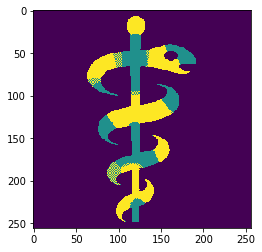

In [79]:
plt.imshow(binarized)

## Problem 3 (30 pts)

### Say hi to the drone

You received a radar-made air scan data of a terrorist hideout made from a heavy-class surveillance drone. Unfortunately, it was made with an old-fashioned radar, so the picture is convolved with the diffractive pattern. You need to deconvolve the picture to recover the building plan.

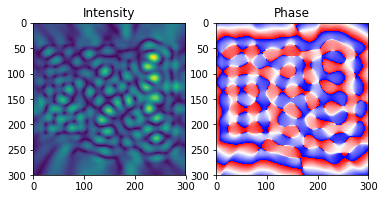

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel2
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
T_{\overline{i_1 j_1}, \overline{i_2 j_2} } \equiv eG_{i_1-j_1,i_2-j_2}  = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$T_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$


### Tasks:

1. (5 pts) Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. (5 pts) Write function `Gx` that calculates matvec of $T$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. Hint: matvex with a delta function in pl

3. (3 pts) What is the complexity of one matvec? 
4. (2 pts) Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. (15 pts) Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.g. `numpy.fft`


### 1. Kernel (5 pts)

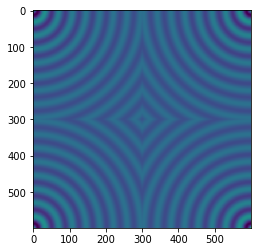

In [64]:
k0 = 50.0#
N = 300#

def make_eG(k0, N):  
    eG = np.zeros((2*N-1,2*N-1),dtype=np.complex64)

    
    for i in range(-N+1,N):
        for j in range(-N+1,N):
            if(i==0 & j==0):
                eG[i][j] = 0
            else:
                r = 1/(N-1)*np.sqrt(i**2+j**2)
                eG[i][j]= -1j/4*hankel2(0,k0*r)
    return eG

eG = make_eG(k0=k0, N=N)

plt.imshow(eG.real)

### 2. Matvec (5 pts)

In [65]:
def Gx(x,eG):
    N=int(np.sqrt(x.size))
    X_matrix = np.zeros(eG.shape, dtype = np.complex64)
    X_matrix=x.reshape(N,N)
    X_matrix = np.pad(X_matrix, (0,N-1),'constant',constant_values = 0)
    matvec=(np.fft.ifft2(np.fft.fft2(eG)*np.fft.fft2(X_matrix)))[:N,:N].flatten()

    return matvec
    
    

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is ... It can be shown...

Complexity of one matvec operation is $\mathcal{O}(nlog(n)) $

We know that matvec with Toeplitz matrix is $(2N-1)^2=\mathcal{O}(N^2)$

So complexity is $\mathcal{O}(N^2(log(N))$

### 4. LinearOperator (2 pts)

In [68]:
x = np.random.rand((90000))
L_Gx = scipy.sparse.linalg.LinearOperator((90000,90000), matvec=lambda x, eG=eG: Gx(x,eG))

### 5. Reconstruction (15pts)

C:\Users\nikos\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Convergence')

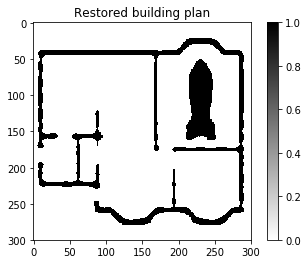

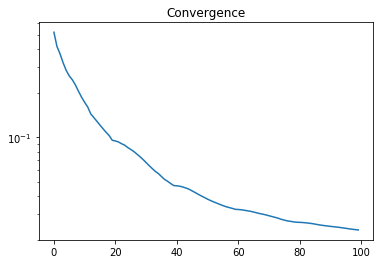

In [69]:
def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global errs
    errs.append(err)
    return 
x = radiointel.reshape(90000)#, order= 'f')
x,y= scipy.sparse.linalg.gmres(L_Gx,x, maxiter=100,restart=None,callback=callback)
mask = x.reshape(300,300)#, order= 'f')
plt.figure()
plt.imshow( normalize(mask) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar()

plt.figure()
plt.semilogy(errs)
plt.title('Convergence')

We found it